In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("./Datasets/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df.tail(10)

,Category,Message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [37]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [38]:
lr = LabelEncoder()
df.Category = lr.fit_transform(df.Category)

In [39]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df.rename(columns = {'Category':'Spam'}, inplace = True)

In [41]:
df.head()

,Spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
values = df.pop("Spam")
df.insert(1, 'Spam', values)

In [43]:
df.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [44]:
df.shape

(5572, 2)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  5572 non-null   object
 1   Spam     5572 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [46]:
df.describe()

,Spam
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [47]:
df.nunique()

Message    5157
Spam          2
dtype: int64

In [48]:
df.Spam.unique()

array([0, 1])

In [49]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.Message, df.Spam , train_size= .8)

In [50]:
x_train

2298                            Draw va?i dont think so:)
430     I wnt to buy a BMW car urgently..its vry urgen...
3712                      Sorry pa, i dont knw who ru pa?
3030                What is your record for one night? :)
1902                               Sorry, I'll call later
                              ...                        
1129    Ur HMV Quiz cash-balance is currently £500 - t...
1540    You're not sure that I'm not trying to make xa...
3883    Short But Cute: "Be a good person, but dont tr...
5235    Am on the uworld site. Am i buying the qbank o...
1511    Pete,is this your phone still? Its Jenny from ...
Name: Message, Length: 4457, dtype: object

In [51]:
x_test

2024    Is there any movie theatre i can go to and wat...
5352             Good morning princess! Have a great day!
3574    You won't believe it but it's true. It's Incre...
1751                           Got it..mail panren paru..
5223             If I die I want u to have all my stuffs.
                              ...                        
2515        Ok ill send you with in  &lt;DECIMAL&gt;  ok.
936                            Then dun wear jeans lor...
4702                               I liked the new mobile
1694    Was gr8 to see that message. So when r u leavi...
1678             Lol where do u come up with these ideas?
Name: Message, Length: 1115, dtype: object

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_transformed = v.fit_transform(x_train.values)

In [53]:
x_transformed.toarray()[1114]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
v.get_feature_names_out()[4809]

'ninish'

In [55]:
v.vocabulary_

{'draw': 2449,
 'va': 7262,
 'dont': 2418,
 'think': 6870,
 'so': 6308,
 'wnt': 7599,
 'to': 6959,
 'buy': 1582,
 'bmw': 1412,
 'car': 1649,
 'urgently': 7234,
 'its': 3788,
 'vry': 7356,
 'urgent': 7233,
 'but': 1577,
 'hv': 3583,
 'shortage': 6147,
 'of': 4919,
 'lt': 4272,
 'gt': 3284,
 'lacs': 4009,
 'there': 6858,
 'is': 3770,
 'no': 4820,
 'source': 6372,
 'arng': 1062,
 'dis': 2346,
 'amt': 947,
 'thats': 6839,
 'my': 4689,
 'prob': 5447,
 'sorry': 6358,
 'pa': 5072,
 'knw': 3984,
 'who': 7524,
 'ru': 5865,
 'what': 7502,
 'your': 7747,
 'record': 5658,
 'for': 2957,
 'one': 4966,
 'night': 4800,
 'll': 4178,
 'call': 1607,
 'later': 4046,
 'will': 7548,
 'purchase': 5519,
 'stuff': 6571,
 'today': 6964,
 'and': 954,
 'mail': 4341,
 'you': 7743,
 'do': 2381,
 'have': 3377,
 'po': 5284,
 'box': 1455,
 'number': 4881,
 'dear': 2196,
 'where': 7512,
 'me': 4432,
 'reckon': 5655,
 'need': 4750,
 'be': 1273,
 'in': 3658,
 'town': 7028,
 'by': 1591,
 'eightish': 2559,
 'walk': 7388,
 

In [56]:
np.where(x_transformed.toarray()[1114] != 0)

(array([ 954, 1311, 2005, 2211, 2320, 2685, 2821, 3194, 3394, 3685, 3770,
        5920, 6840, 6904, 6927, 7211, 7299, 7437, 7548, 7578], dtype=int64),)

In [57]:
x_train[1114]

"No I'm good for the movie, is it ok if I leave in an hourish?"

In [58]:
v.get_feature_names_out()[3302]

'gumby'

In [59]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [60]:
model.fit(x_transformed,y_train)

MultinomialNB()

In [61]:
x_test_transformed = v.transform(x_test)

In [62]:
x_transformed.shape

(4457, 7779)

In [63]:
x_test_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
y_pred = model.predict(x_test_transformed)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))
print(confusion_matrix( y_test,y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       956
           1       0.94      0.97      0.96       159

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[946   4]
 [ 10 155]]


<Axes: >

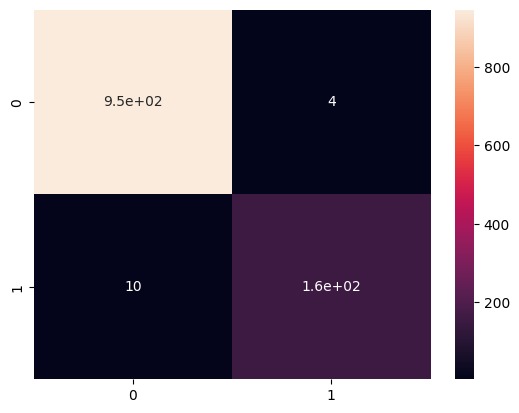

In [75]:
sns.heatmap(confusion_matrix(y_test ,y_pred ),annot=True)